In [6]:
import pandas as pd
import numpy as np
import os

# Paths
RAW_DIR = "../data/raw/"
PROCESSED_DIR = "../data/processed/"

In [7]:
# Load e-commerce transaction data
ecom_df = pd.read_csv(os.path.join(RAW_DIR, "Fraud_Data.csv"))

# Load bank creditcard data
credit_df = pd.read_csv(os.path.join(RAW_DIR, "creditcard.csv"))

# Load IP to country mapping
ip_df = pd.read_csv(os.path.join(RAW_DIR, "IpAddress_to_Country.csv"))


In [8]:
# Check missing values for all datasets
print("E-commerce Missing:\n", ecom_df.isnull().sum())
print("\nCredit Card Missing:\n", credit_df.isnull().sum())
print("\nIP Address to Country Missing:\n", ip_df.isnull().sum())


E-commerce Missing:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Credit Card Missing:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

IP Address to Country Missing:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [9]:
# Remove duplicates from all datasets
ecom_df = ecom_df.drop_duplicates()
credit_df = credit_df.drop_duplicates()
ip_df = ip_df.drop_duplicates()

In [10]:
# Convert time columns to datetime in e-commerce dataset
ecom_df['signup_time'] = pd.to_datetime(ecom_df['signup_time'])
ecom_df['purchase_time'] = pd.to_datetime(ecom_df['purchase_time'])

In [11]:
# Check data types
print("E-commerce dtypes:\n", ecom_df.dtypes)
print("\nCredit Card dtypes:\n", credit_df.dtypes)
print("\nIP Address Mapping dtypes:\n", ip_df.dtypes)

E-commerce dtypes:
 user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

Credit Card dtypes:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

IP Addre

In [12]:
# Fix IP data types
ecom_df['ip_address'] = ecom_df['ip_address'].astype(str)
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(str)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(str)

Univariate Analysis (E-commerce Data)

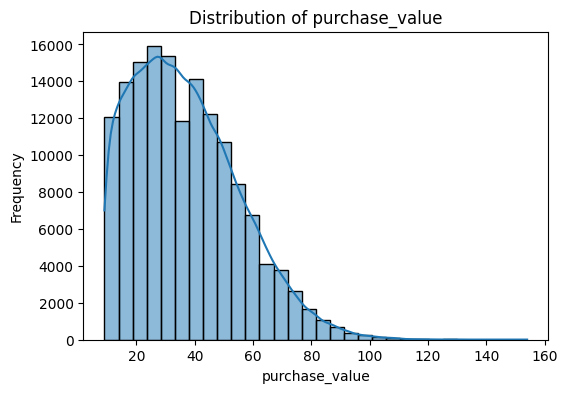

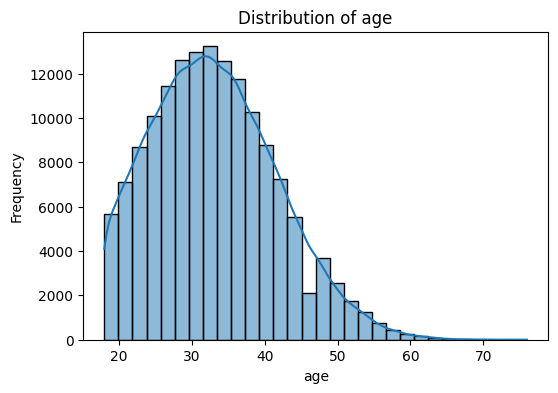

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
num_cols = ['purchase_value', 'age']

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(ecom_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

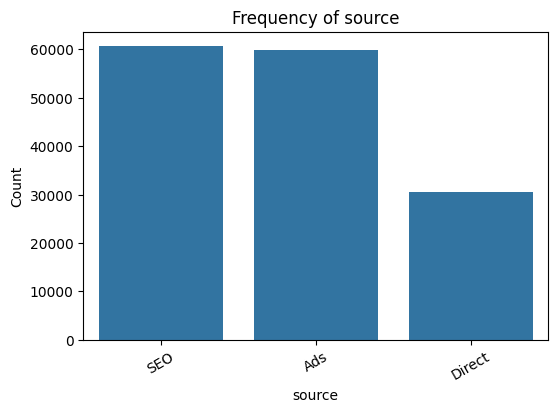

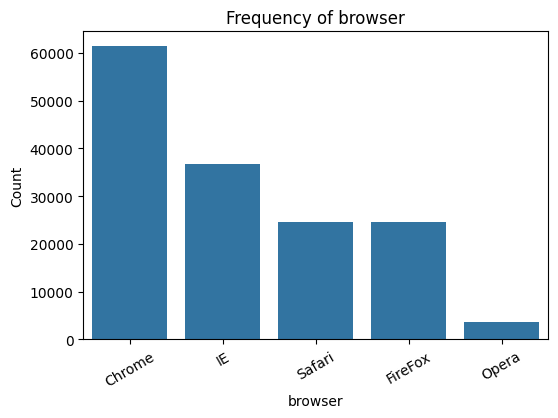

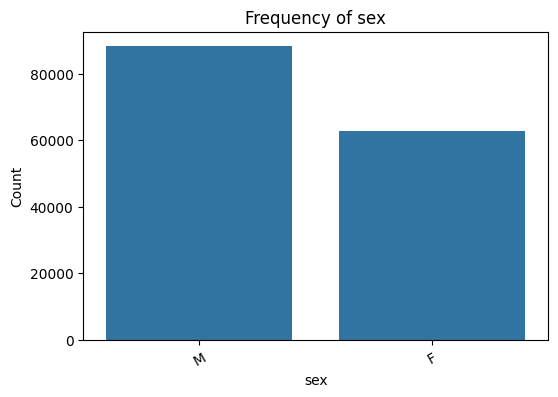

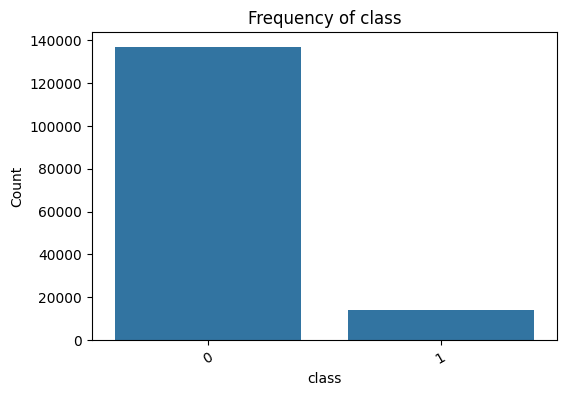

In [14]:
cat_cols = ['source', 'browser', 'sex', 'class']

# Bar plots
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=ecom_df, x=col, order=ecom_df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()


Bivariate Analysis

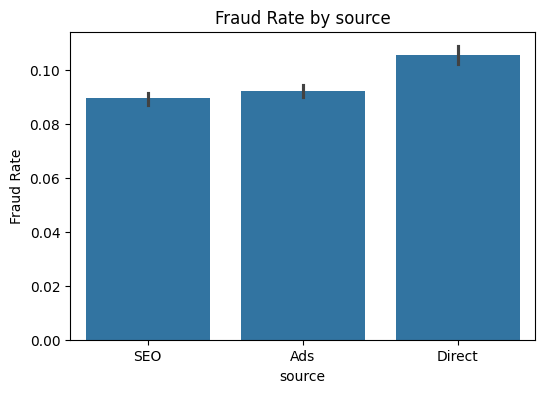

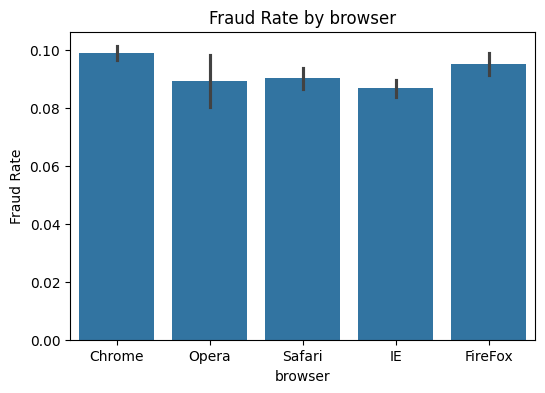

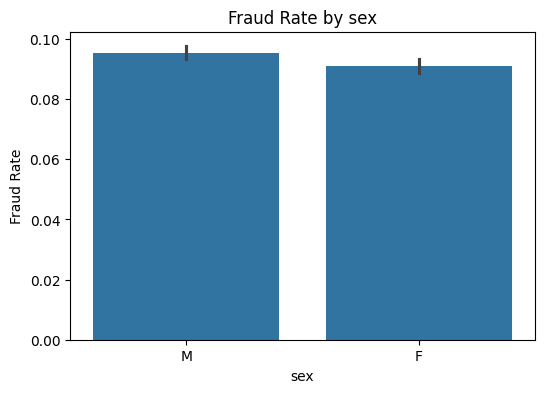

In [15]:
# Fraud rate by category
for col in ['source', 'browser', 'sex']:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='class', data=ecom_df)
    plt.title(f'Fraud Rate by {col}')
    plt.ylabel('Fraud Rate')
    plt.show()

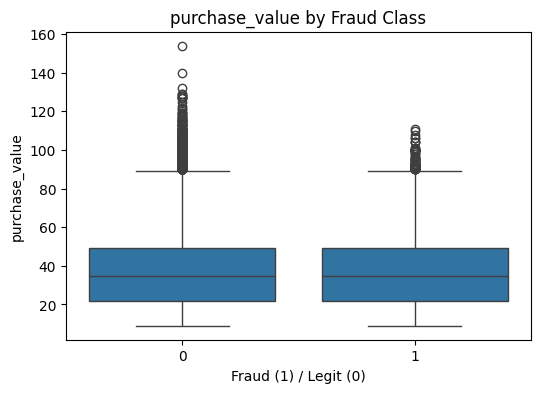

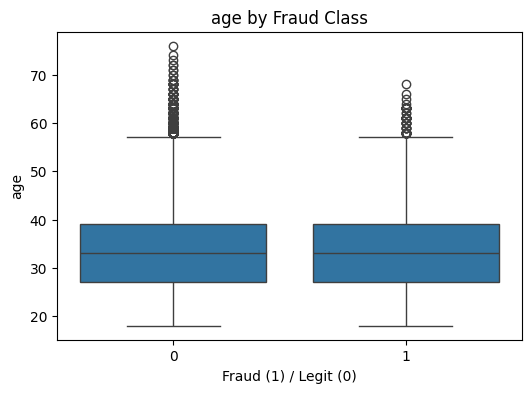

In [16]:
# Boxplots
for col in ['purchase_value', 'age']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=ecom_df)
    plt.title(f'{col} by Fraud Class')
    plt.xlabel('Fraud (1) / Legit (0)')
    plt.ylabel(col)
    plt.show()

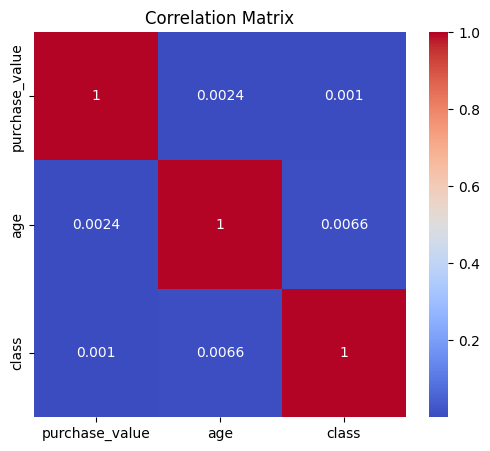

In [17]:
# Add more numeric columns if needed
corr_cols = ['purchase_value', 'age', 'class']

plt.figure(figsize=(6, 5))
sns.heatmap(ecom_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Convert ecom ip_address to int (from float)
ecom_df['ip_int'] = ecom_df['ip_address'].astype(float).astype(int)

# Convert ip_df bounds safely
ip_df['lower_bound_ip_address'] = pd.to_numeric(ip_df['lower_bound_ip_address'], errors='coerce').astype(float).astype(int)
ip_df['upper_bound_ip_address'] = pd.to_numeric(ip_df['upper_bound_ip_address'], errors='coerce').astype(float).astype(int)

# Sort dataframes
ecom_df = ecom_df.sort_values('ip_int').reset_index(drop=True)
ip_df = ip_df.sort_values('lower_bound_ip_address').reset_index(drop=True)

# Merge_asof join
merged_df = pd.merge_asof(
    ecom_df,
    ip_df,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter rows where ip_int <= upper_bound_ip_address
merged_df = merged_df[merged_df['ip_int'] <= merged_df['upper_bound_ip_address']]

print(merged_df[['ip_address', 'ip_int', 'country']].head(10))


           ip_address    ip_int    country
634  16778864.0719029  16778864  Australia
635  16842045.7400675  16842045   Thailand
636   16843656.533029  16843656      China
637  16938732.8341595  16938732      China
638   16971984.197124  16971984   Thailand
639  16995546.2918759  16995546      China
640  17097732.2988486  17097732   Thailand
641  17124428.2834231  17124428      Japan
642  17134590.5055091  17134590      Japan
643   17162159.687583  17162159      Japan


In [19]:
# Make a copy to avoid modifying original directly
df = ecom_df.copy()

# -----------------------------
# 1. Transaction Frequency / Velocity
# -----------------------------

# Count of transactions per user
df['transaction_count'] = df.groupby('user_id')['user_id'].transform('count')

# Average time between purchases per user (in hours)
df['prev_purchase_time'] = df.groupby('user_id')['purchase_time'].shift(1)
df['time_since_last_purchase'] = (df['purchase_time'] - df['prev_purchase_time']).dt.total_seconds() / 3600

# Fill NaN values with 0 (e.g., first purchase)
df['time_since_last_purchase'].fillna(0, inplace=True)

# -----------------------------
# 2. Time-based Features
# -----------------------------

# Hour of the day when the purchase happened
df['hour_of_day'] = df['purchase_time'].dt.hour

# Day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['purchase_time'].dt.dayofweek

# Duration between signup and purchase (in hours)
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600

# -----------------------------
# Optional: Drop intermediate columns if not needed
# -----------------------------
df.drop(columns=['prev_purchase_time'], inplace=True)

# Preview engineered features
print(df[['user_id', 'transaction_count', 'time_since_last_purchase', 'hour_of_day', 'day_of_week', 'time_since_signup']].head())


   user_id  transaction_count  time_since_last_purchase  hour_of_day  \
0    62421                  1                       0.0           10   
1   173212                  1                       0.0           17   
2   242286                  1                       0.0            8   
3   370003                  1                       0.0           21   
4   119824                  1                       0.0            7   

   day_of_week  time_since_signup  
0            6         489.726111  
1            4         301.339722  
2            1         208.144444  
3            3        2065.176111  
4            6         391.005278  


C:\Users\fikre\AppData\Local\Temp\ipykernel_23696\1716012698.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_since_last_purchase'].fillna(0, inplace=True)


In [20]:
# Class distribution
print(df['class'].value_counts(normalize=True) * 100)


class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split

# Drop non-numeric/categorical/raw timestamp fields for now
X = df.drop(columns=['class', 'purchase_time', 'signup_time', 'user_id', 'ip_address'])  # remove irrelevant/raw cols
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
